In [61]:
import pandas as pd
df = pd.read_csv('http://home.agh.edu.pl/~czech/vis-datasets/misc/04cars-data.csv', header = 0)
data = df.iloc[:,-11:]
array = data.values

In [62]:
from sklearn.preprocessing import normalize
import numpy as np
normalized = (array - array.mean(axis=0)) / array.std(axis=0)
# średnia = 0
print(np.mean(normalized, axis=0))
# odchylenie = 1
print(np.std(normalized, axis=0))

[-4.13106242e-17  4.13106242e-17 -6.05889155e-16 -1.00981526e-16
 -1.79012705e-16 -4.59006935e-18 -7.57361443e-17 -2.06553121e-16
  7.89491929e-16 -6.70150125e-16  1.78094691e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [63]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(normalized)

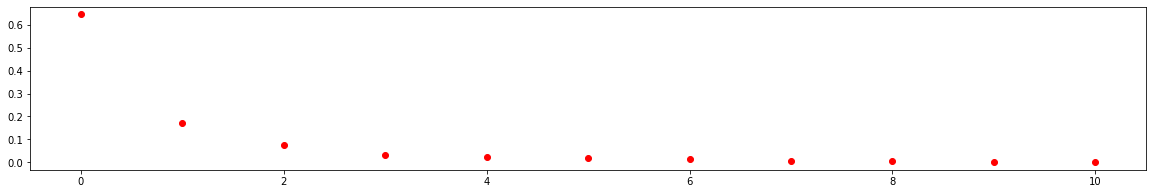

Wariancja z: 2 cechami - 0.645876220979663, 3 cechami - 0.8171421089701892


In [64]:
import matplotlib.pyplot as plt
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(f"Wariancja z: 2 cechami - {sum(variance_ratio[0:1])}, 3 cechami - {sum(variance_ratio[0:2])}")

In [65]:
attributes = df.iloc[:,-11:].columns
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print('Attribute\t\t PC1\t\t\tPC2')
for i in range(0,pc1.shape[0]):
    print(attributes[i] + ('\t' if len(attributes[i])<8 else '') + '\t' + repr(pc1[i]) + '\t' + repr(pc2[i]))

Attribute		 PC1			PC2
Retail Price	-0.2637504434440343	0.4685086975025387
Dealer Cost	-0.26231863875309525	0.47014658513822594
Engine Size (l)	-0.347080492025201	-0.015347186463713858
Cyl		-0.3341887576286371	0.07803201087501857
HP		-0.31860225848402934	0.29221347613918214
City MPG	0.31048172673231283	-0.003365935761659
Hwy MPG		0.30658863858044444	-0.010964460145348576
Weight		-0.33632936694048793	-0.1674635715478704
Wheel Base	-0.2662100335710542	-0.41817710695920424
Len		-0.2567901876706822	-0.40841138066875443
Width		-0.29605459141706114	-0.31289135016250713


Wartości bliskie zeru nie cechują samochodów względem danej cechy wiodącej. Będą one na środku wykesu.

Największe komponenty pierwszego wiążą się z zużyciem paliwa na dystans (MPG)

Najmniejsze komponenty pierwszego wiążą się z wagą, rozmiarem silnika i liczbą cylindrów

Największe komponenty drugiego wiążą się z ceną samochodu

Najmniejsze komponenty drugiego wiążą się z wymiarami fizycznymi samochodu

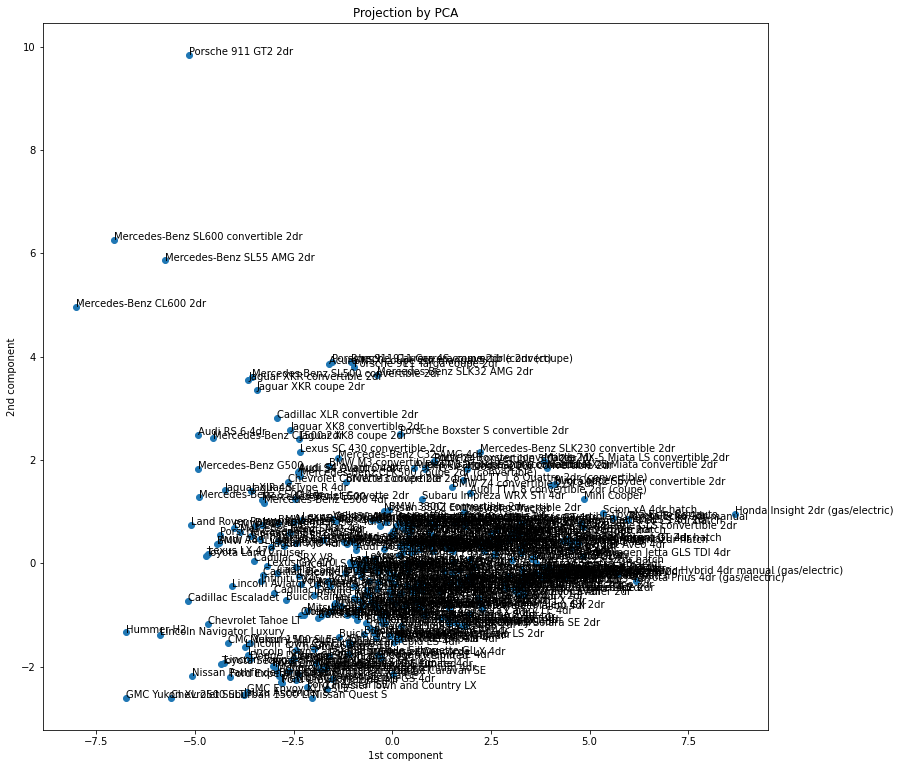

In [66]:
cars = df.iloc[:,0] 
plt.figure(figsize=(13,13))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, txt in enumerate(cars):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]))
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

Po lewej na górze widzimy auta sportowe. Po lewej na dole ciężkie auta takie jak pickupy czy SUVy. Po prawej ekonomiczne auta (mało palące)

<function matplotlib.pyplot.show(close=None, block=None)>

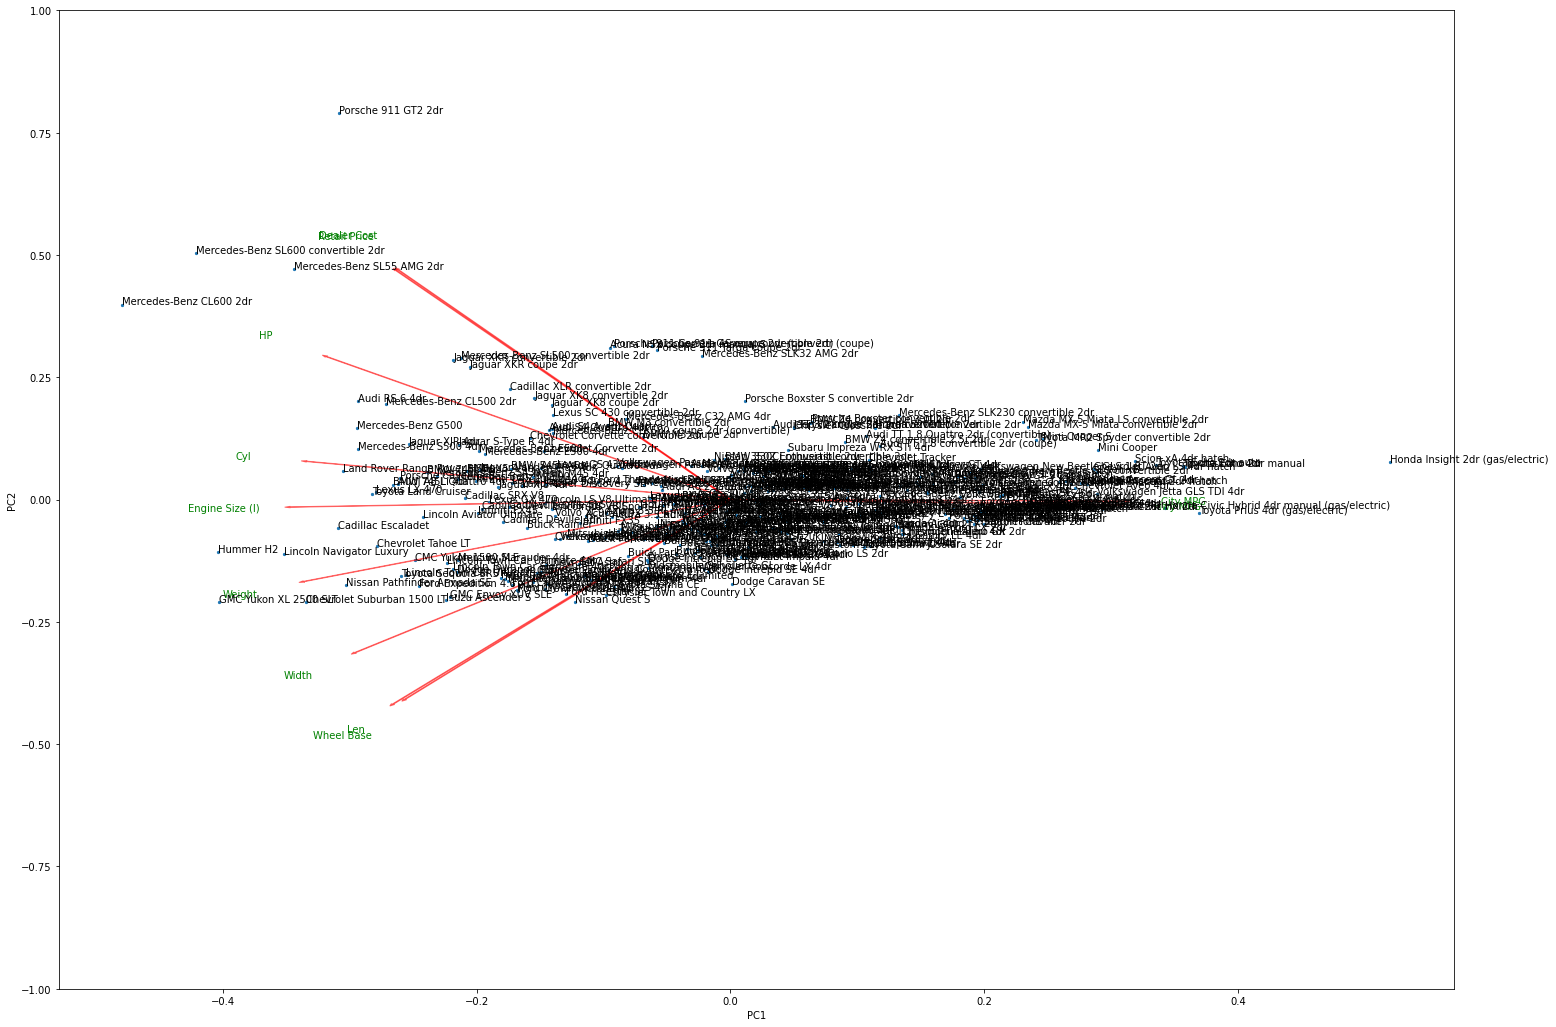

In [67]:
def myplot(score,coeff,labels=None):
    plt.figure(figsize=(25,18))
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    # names drawn here
    for i, txt in enumerate(cars):
        plt.annotate(txt, (X_pca[i, 0]*scalex, X_pca[i, 1]*scaley))
 
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2,:]),attributes)
plt.gca().set_ylim([-1.0,1.0])
plt.show
